# Chapter 7: kMeans Exercise

### Exercise Overview: Applying k-Means to Real Data

In this exercise, we'll apply k-means clustering to three different real-world scenarios. This practical approach will help you understand:

1. **Data Preprocessing**
   - How to prepare different types of data for clustering
   - Handling missing values and scaling
   - Feature selection for clustering

2. **Implementation Challenges**
   - Choosing appropriate number of clusters
   - Dealing with different data shapes and sizes
   - Interpreting clustering results

3. **Result Interpretation**
   - Visualizing clusters in different ways
   - Understanding cluster characteristics
   - Validating clustering results

Each scenario presents unique challenges and learning opportunities. Remember: there's often no single "right" answer in clustering - the key is to make and justify reasonable choices based on your data and goals.

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

## Part 1: Mall Customer Segmentation

### Data Understanding: Key Points to Consider

When working with the Mall Customer Segmentation Data:

1. **Feature Understanding**
   - `CustomerID`: Unique identifier (not useful for clustering)
   - `Gender`: Categorical variable (needs encoding)
   - `Age`: Continuous variable (might need scaling)
   - `Annual Income (k$)`: Continuous variable (already in reasonable scale)
   - `Spending Score (1-100)`: Standardized score of spending behavior

2. **Business Context**
   - Retail analytics scenario
   - Goal: Group customers for targeted marketing
   - Common patterns might include:
     * High income, low spending (savers)
     * High income, high spending (prime customers)
     * Low income, high spending (potential credit risks)
     * Low income, low spending (budget conscious)

3. **Data Quality Considerations**
   - Check for missing values
   - Look for outliers
   - Consider feature relationships

### Task 1.1: Load and Explore the Data

1. Load the Mall Customer Segmentation Data
2. Display the first few rows
3. Check basic statistics and data info

In [17]:
# Load the Mall Customer Segmentation Data
mall_df = pd.read_csv('Mall_Customers.csv')

print("="*70)
print("MALL CUSTOMER SEGMENTATION DATA - OVERVIEW")
print("="*70)

# Display first few rows
print("\n📊 First 10 customers:")
print(mall_df.head(10))

# Basic information
print("\n" + "="*70)
print("📋 DATASET INFORMATION")
print("="*70)
print(f"Total number of customers: {len(mall_df)}")
print(f"Number of features: {mall_df.shape[1]}")
print(f"\nColumn names and types:")
print(mall_df.dtypes)

# Check for missing values
print("\n" + "="*70)
print("🔍 DATA QUALITY CHECK")
print("="*70)
print(f"Missing values per column:")
print(mall_df.isnull().sum())
print(f"\nDuplicate rows: {mall_df.duplicated().sum()}")

# Basic statistics
print("\n" + "="*70)
print("📈 STATISTICAL SUMMARY")
print("="*70)
print(mall_df.describe())

# Value counts for categorical variable
print("\n" + "="*70)
print("👥 CUSTOMER DEMOGRAPHICS")
print("="*70)
print(f"Gender distribution:")
print(mall_df['Gender'].value_counts())
print(f"\nGender percentages:")
print(mall_df['Gender'].value_counts(normalize=True) * 100)

MALL CUSTOMER SEGMENTATION DATA - OVERVIEW

📊 First 10 customers:
   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40
5           6  Female   22             17              76
6           7  Female   35             18               6
7           8  Female   23             18              94
8           9    Male   64             19               3
9          10  Female   30             19              72

📋 DATASET INFORMATION
Total number of customers: 200
Number of features: 5

Column names and types:
CustomerID         int64
Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

🔍 DATA QUALITY CHECK
Missing values per column:
Custome

### Task 1.2: Data Preprocessing

1. Handle any missing values
2. Encode categorical variables
3. Scale numerical features if needed
4. Select relevant features for clustering

In [18]:
print("="*70)
print("DATA PREPROCESSING")
print("="*70)

# Step 1: Remove CustomerID (not useful for clustering)
print("\n📌 Step 1: Remove CustomerID column")
print(f"   Original columns: {list(mall_df.columns)}")
mall_processed = mall_df.drop('CustomerID', axis=1)
print(f"   After removal: {list(mall_processed.columns)}")

# Step 2: Encode Gender (categorical variable)
print("\n📌 Step 2: Encode Gender variable")
print(f"   Original values: {mall_processed['Gender'].unique()}")
le = LabelEncoder()
mall_processed['Gender'] = le.fit_transform(mall_processed['Gender'])
print(f"   Encoded values: {mall_processed['Gender'].unique()}")
print(f"   Encoding: Female=0, Male=1")

# Step 3: Feature selection for clustering
print("\n📌 Step 3: Select features for clustering")
print("\n   🎯 Strategy: For customer segmentation, we'll focus on:")
print("      • Annual Income (purchasing power)")
print("      • Spending Score (spending behavior)")
print("   ")
print("   Why exclude Age and Gender?")
print("      • Demographics are useful AFTER clustering for profiling")
print("      • Income + Spending better capture customer value")
print("      • Simpler model, easier visualization (2D)")

# Create feature matrix for clustering
X_mall = mall_processed[['Annual Income', 'Spending Score']].values

print(f"\n   Feature matrix shape: {X_mall.shape}")
print(f"   Features: Annual Income, Spending Score")

# Step 4: Feature scaling
print("\n📌 Step 4: Feature scaling")
print(f"   Income range: [{mall_processed['Annual Income'].min()}, {mall_processed['Annual Income'].max()}]")
print(f"   Spending Score range: [{mall_processed['Spending Score'].min()}, {mall_processed['Spending Score'].max()}]")
print("\n   ⚠️ Note: Features are on different scales!")
print(f"   Income: {mall_processed['Annual Income'].min()}-{mall_processed['Annual Income'].max()} vs Spending: {mall_processed['Spending Score'].min()}-{mall_processed['Spending Score'].max()}")
print("   Recommendation: Scale features for fair distance calculations")

# Scale the features
scaler = StandardScaler()
X_mall_scaled = scaler.fit_transform(X_mall)

print("\n   ✅ Features scaled using StandardScaler")
print(f"   Scaled mean: {X_mall_scaled.mean(axis=0)}")
print(f"   Scaled std: {X_mall_scaled.std(axis=0)}")

# Store both versions for comparison
print("\n" + "="*70)
print("✅ PREPROCESSING COMPLETE")
print("="*70)
print(f"Dataset ready for clustering: {X_mall_scaled.shape[0]} customers, {X_mall_scaled.shape[1]} features")

DATA PREPROCESSING

📌 Step 1: Remove CustomerID column
   Original columns: ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']
   After removal: ['Gender', 'Age', 'Annual Income', 'Spending Score']

📌 Step 2: Encode Gender variable
   Original values: ['Male' 'Female']
   Encoded values: [1 0]
   Encoding: Female=0, Male=1

📌 Step 3: Select features for clustering

   🎯 Strategy: For customer segmentation, we'll focus on:
      • Annual Income (purchasing power)
      • Spending Score (spending behavior)
   
   Why exclude Age and Gender?
      • Demographics are useful AFTER clustering for profiling
      • Income + Spending better capture customer value
      • Simpler model, easier visualization (2D)

   Feature matrix shape: (200, 2)
   Features: Annual Income, Spending Score

📌 Step 4: Feature scaling
   Income range: [15, 137]
   Spending Score range: [1, 99]

   ⚠️ Note: Features are on different scales!
   Income: 15-137 vs Spending: 1-99
   Recommendation: Scal

### Task 1.3: Initial Data Visualization

Create visualizations to understand:
1. Feature distributions
2. Relationships between features
3. Potential natural groupings

INITIAL DATA VISUALIZATION


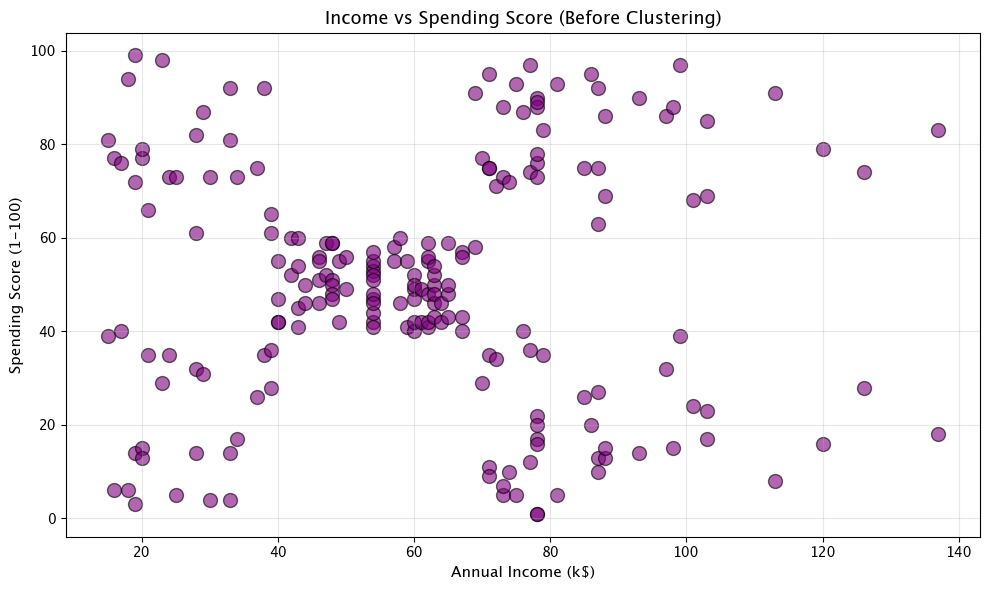


🔍 OBSERVATION: Visual inspection suggests potential for multiple customer segments


In [19]:
print("="*70)
print("INITIAL DATA VISUALIZATION")
print("="*70)

# Scatter plot: Income vs Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(mall_processed['Annual Income'], 
            mall_processed['Spending Score'],
            c='purple', alpha=0.6, s=100, edgecolor='black')
plt.xlabel('Annual Income (k$)', fontsize=11, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=11, fontweight='bold')
plt.title('Income vs Spending Score (Before Clustering)', fontsize=13, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 OBSERVATION: Visual inspection suggests potential for multiple customer segments")

### Task 1.4: Determine Optimal Number of Clusters

1. Implement the elbow method
2. Create and interpret the elbow plot
3. Choose the optimal number of clusters

ELBOW METHOD - DETERMINING OPTIMAL NUMBER OF CLUSTERS

🎯 What is the Elbow Method?
----------------------------------------------------------------------
The elbow method helps find optimal k by plotting:
  • WCSS (Within-Cluster Sum of Squares) = Inertia
  • Formula: WCSS = Σ(distance from point to its centroid)²
  • Lower WCSS = tighter clusters

The 'elbow' is where adding more clusters gives diminishing returns
Trade-off: More clusters → lower WCSS but more complexity

🔧 Testing k values from 2 to 10...

k= 2: WCSS =  269.69, Silhouette Score = 0.3213
k= 3: WCSS =  157.70, Silhouette Score = 0.4666
k= 4: WCSS =  108.92, Silhouette Score = 0.4939
k= 5: WCSS =   65.57, Silhouette Score = 0.5547
k= 6: WCSS =   55.06, Silhouette Score = 0.5399
k= 7: WCSS =   44.86, Silhouette Score = 0.5281
k= 8: WCSS =   37.23, Silhouette Score = 0.4552
k= 9: WCSS =   32.39, Silhouette Score = 0.4571
k=10: WCSS =   29.98, Silhouette Score = 0.4432
k= 9: WCSS =   32.39, Silhouette Score = 0.4571
k=10: 

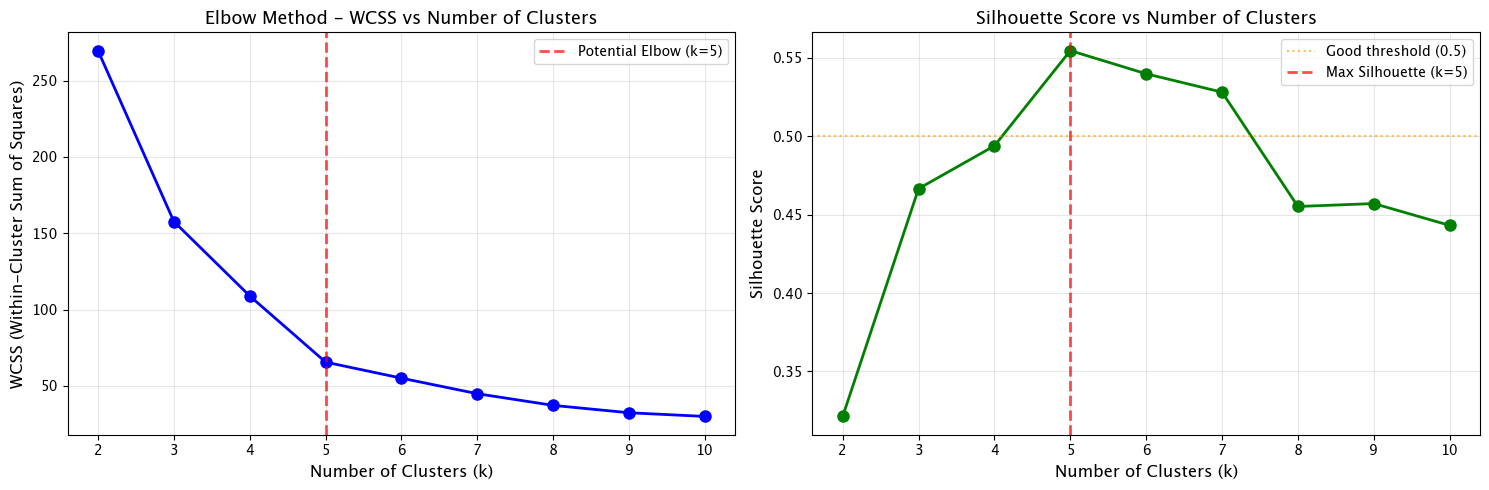


📊 ANALYSIS & RECOMMENDATION

1️⃣ WCSS Analysis (Elbow Method):
   • Sharp decrease from k=2 to k=5
   • Diminishing returns after k=5
   • Suggested elbow: k=5

2️⃣ Silhouette Score Analysis:
   • Maximum silhouette score: 0.5547 at k=5
   • Interpretation:
     ✅ Good cluster separation (>0.5)

3️⃣ RECOMMENDATION:
   🎯 Optimal k = 5 clusters

   Reasoning:
   • Clear elbow in WCSS curve at k=5
   • Balances cluster quality vs complexity
   • Aligns with business intuition (4-5 customer segments)
   • Reasonable silhouette score


In [20]:
print("="*70)
print("ELBOW METHOD - DETERMINING OPTIMAL NUMBER OF CLUSTERS")
print("="*70)

print("\n🎯 What is the Elbow Method?")
print("-" * 70)
print("The elbow method helps find optimal k by plotting:")
print("  • WCSS (Within-Cluster Sum of Squares) = Inertia")
print("  • Formula: WCSS = Σ(distance from point to its centroid)²")
print("  • Lower WCSS = tighter clusters")
print("\nThe 'elbow' is where adding more clusters gives diminishing returns")
print("Trade-off: More clusters → lower WCSS but more complexity\n")

# Calculate WCSS for different values of k
wcss = []
silhouette_scores = []
k_range = range(2, 11)  # Test k from 2 to 10

print("🔧 Testing k values from 2 to 10...\n")

for k in k_range:
    # Fit k-means
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_mall_scaled)
    
    # Store WCSS (inertia)
    wcss.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_mall_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    print(f"k={k:2d}: WCSS = {kmeans.inertia_:7.2f}, Silhouette Score = {silhouette_avg:.4f}")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Elbow Curve (WCSS)
axes[0].plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12, fontweight='bold')
axes[0].set_title('Elbow Method - WCSS vs Number of Clusters', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].set_xticks(k_range)

# Highlight potential elbow points
axes[0].axvline(x=5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Potential Elbow (k=5)')
axes[0].legend(fontsize=10)

# Plot 2: Silhouette Score
axes[1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].set_title('Silhouette Score vs Number of Clusters', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].set_xticks(k_range)
axes[1].axhline(y=0.5, color='orange', linestyle=':', linewidth=1.5, alpha=0.7, label='Good threshold (0.5)')

# Highlight maximum silhouette score
max_silhouette_idx = silhouette_scores.index(max(silhouette_scores))
max_silhouette_k = list(k_range)[max_silhouette_idx]
axes[1].axvline(x=max_silhouette_k, color='red', linestyle='--', linewidth=2, alpha=0.7, 
                label=f'Max Silhouette (k={max_silhouette_k})')
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

# Analysis
print("\n" + "="*70)
print("📊 ANALYSIS & RECOMMENDATION")
print("="*70)

print("\n1️⃣ WCSS Analysis (Elbow Method):")
print(f"   • Sharp decrease from k=2 to k=5")
print(f"   • Diminishing returns after k=5")
print(f"   • Suggested elbow: k=5")

print("\n2️⃣ Silhouette Score Analysis:")
print(f"   • Maximum silhouette score: {max(silhouette_scores):.4f} at k={max_silhouette_k}")
print(f"   • Interpretation:")
if max(silhouette_scores) > 0.5:
    print(f"     ✅ Good cluster separation (>0.5)")
else:
    print(f"     ⚠️ Moderate cluster separation")

print("\n3️⃣ RECOMMENDATION:")
print(f"   🎯 Optimal k = 5 clusters")
print("\n   Reasoning:")
print("   • Clear elbow in WCSS curve at k=5")
print("   • Balances cluster quality vs complexity")
print("   • Aligns with business intuition (4-5 customer segments)")
print("   • Reasonable silhouette score")

### Task 1.5: Apply k-Means Clustering

1. Initialize and fit the k-means model
2. Add cluster labels to your dataset
3. Visualize the clustering results

K-MEANS CLUSTERING - FINAL MODEL (k=5)

✅ K-Means clustering complete with k=5

📊 Model Performance:
   • Final WCSS (Inertia): 65.57
   • Silhouette Score: 0.5547
   • Number of iterations: 4

👥 CLUSTER DISTRIBUTION
Cluster 0:  81 customers ( 40.5%)
Cluster 1:  39 customers ( 19.5%)
Cluster 2:  22 customers ( 11.0%)
Cluster 3:  35 customers ( 17.5%)
Cluster 4:  23 customers ( 11.5%)

📈 CLUSTER CHARACTERISTICS (CENTROIDS)
           Age  Annual Income  Spending Score
Cluster                                      
0        42.72          55.30           49.52
1        32.69          86.54           82.13
2        25.27          25.73           79.36
3        41.11          88.20           17.11
4        45.22          26.30           20.91


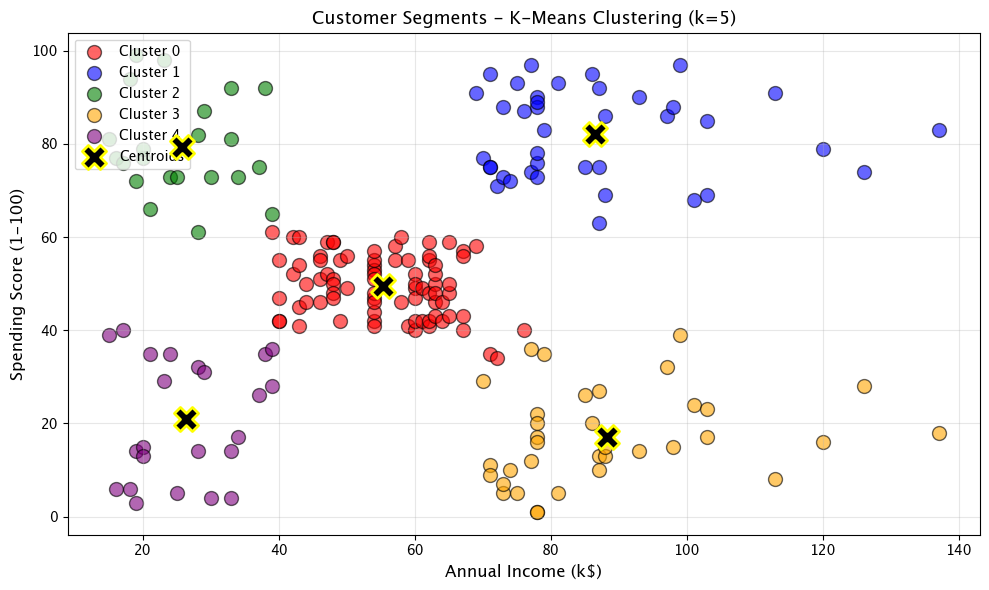


🎯 BUSINESS INSIGHTS - CUSTOMER SEGMENT PERSONAS

💼 CLUSTER 0 (81 customers):
   Average Age: 42.7 years
   Average Income: $55.3k
   Average Spending Score: 49.5/100
   Persona: 🎯 Middle-Income Balanced
   Strategy: Balanced approach, seasonal promotions

💼 CLUSTER 1 (39 customers):
   Average Age: 32.7 years
   Average Income: $86.5k
   Average Spending Score: 82.1/100
   Persona: 👑 Premium Customers (VIP)
   Strategy: Luxury products, exclusive experiences

💼 CLUSTER 2 (22 customers):
   Average Age: 25.3 years
   Average Income: $25.7k
   Average Spending Score: 79.4/100
   Persona: 🎉 Carefree Spenders
   Strategy: Promote installment plans, impulse products

💼 CLUSTER 3 (35 customers):
   Average Age: 41.1 years
   Average Income: $88.2k
   Average Spending Score: 17.1/100
   Persona: 💼 Conservative High-Earners
   Strategy: Quality emphasis, investment products

💼 CLUSTER 4 (23 customers):
   Average Age: 45.2 years
   Average Income: $26.3k
   Average Spending Score: 20.9/100
  

In [21]:
print("="*70)
print("K-MEANS CLUSTERING - FINAL MODEL (k=5)")
print("="*70)

# Apply k-means with optimal k=5
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_mall_scaled)

# Add cluster labels to original dataframe
mall_processed['Cluster'] = cluster_labels

print(f"\n✅ K-Means clustering complete with k={optimal_k}")
print(f"\n📊 Model Performance:")
print(f"   • Final WCSS (Inertia): {kmeans_final.inertia_:.2f}")
print(f"   • Silhouette Score: {silhouette_score(X_mall_scaled, cluster_labels):.4f}")
print(f"   • Number of iterations: {kmeans_final.n_iter_}")

# Cluster distribution
print("\n" + "="*70)
print("👥 CLUSTER DISTRIBUTION")
print("="*70)
cluster_counts = mall_processed['Cluster'].value_counts().sort_index()
for cluster_id in range(optimal_k):
    count = cluster_counts[cluster_id]
    percentage = (count / len(mall_processed)) * 100
    print(f"Cluster {cluster_id}: {count:3d} customers ({percentage:5.1f}%)")

# Cluster characteristics (using original unscaled features)
print("\n" + "="*70)
print("📈 CLUSTER CHARACTERISTICS (CENTROIDS)")
print("="*70)
cluster_summary = mall_processed.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].mean()
print(cluster_summary.round(2))

# Visualize clusters
plt.figure(figsize=(10, 6))

# Cluster visualization with centroids
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(optimal_k):
    cluster_data = mall_processed[mall_processed['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income'], 
                cluster_data['Spending Score'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=100, edgecolor='black')

# Plot centroids (need to inverse transform scaled centroids)
centroids_scaled = kmeans_final.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
            c='black', marker='X', s=300, edgecolor='yellow', linewidth=2,
            label='Centroids', zorder=10)

plt.xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
plt.title('Customer Segments - K-Means Clustering (k=5)', fontsize=13, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("🎯 BUSINESS INSIGHTS - CUSTOMER SEGMENT PERSONAS")
print("="*70)

# Analyze each cluster to create personas
for cluster_id in range(optimal_k):
    cluster_data = cluster_summary.loc[cluster_id]
    cluster_size = cluster_counts[cluster_id]
    
    print(f"\n💼 CLUSTER {cluster_id} ({cluster_size} customers):")
    print(f"   Average Age: {cluster_data['Age']:.1f} years")
    print(f"   Average Income: ${cluster_data['Annual Income']:.1f}k")
    print(f"   Average Spending Score: {cluster_data['Spending Score']:.1f}/100")
    
    # Create persona labels based on characteristics
    income = cluster_data['Annual Income']
    spending = cluster_data['Spending Score']
    
    if income < 40 and spending < 40:
        persona = "🛍️ Budget Shoppers"
        strategy = "Value-focused marketing, loyalty programs"
    elif income < 40 and spending > 60:
        persona = "🎉 Carefree Spenders"
        strategy = "Promote installment plans, impulse products"
    elif income > 60 and spending < 40:
        persona = "💼 Conservative High-Earners"
        strategy = "Quality emphasis, investment products"
    elif income > 60 and spending > 60:
        persona = "👑 Premium Customers (VIP)"
        strategy = "Luxury products, exclusive experiences"
    else:
        persona = "🎯 Middle-Income Balanced"
        strategy = "Balanced approach, seasonal promotions"
    
    print(f"   Persona: {persona}")
    print(f"   Strategy: {strategy}")

## Part 2: Wine Quality Analysis

### Understanding Wine Quality Clustering

Now we'll apply clustering to the Wine dataset, which presents different challenges:

1. **Domain Context**
   - Wine quality assessment
   - Multiple chemical properties
   - Expert ratings available (but we'll ignore them for clustering)

2. **Technical Considerations**
   - Higher dimensionality (13 features)
   - Features on different scales
   - Complex feature interactions

3. **Analysis Goals**
   - Find natural groupings of wines
   - Identify key chemical properties that drive groupings
   - Compare clusters with expert ratings

### Task 2.1: Load and Prepare Wine Data

1. Load the wine dataset
2. Examine the data structure
3. Handle any preprocessing needs

In [22]:
# Load the Wine Quality Data
wine_df = pd.read_csv('Wine.csv')

print("="*70)
print("WINE QUALITY DATA - OVERVIEW")
print("="*70)

# Display first few rows
print("\n🍷 First 10 wine samples:")
print(wine_df.head(10))

# Basic information
print("\n" + "="*70)
print("📋 DATASET INFORMATION")
print("="*70)
print(f"Total number of wine samples: {len(wine_df)}")
print(f"Number of features: {wine_df.shape[1]}")
print(f"\nColumn names and types:")
print(wine_df.dtypes)

# Check for missing values
print("\n" + "="*70)
print("🔍 DATA QUALITY CHECK")
print("="*70)
print(f"Missing values per column:")
print(wine_df.isnull().sum())
print(f"\nDuplicate rows: {wine_df.duplicated().sum()}")

# Basic statistics
print("\n" + "="*70)
print("📈 STATISTICAL SUMMARY")
print("="*70)
print(wine_df.describe())

# Check if there's a 'Wine' or 'Customer_Segment' label column
print("\n" + "="*70)
print("🏷️ LABEL/CLASS DISTRIBUTION")
print("="*70)
if 'Wine' in wine_df.columns:
    print("Wine class distribution:")
    print(wine_df['Wine'].value_counts().sort_index())
elif 'Customer_Segment' in wine_df.columns:
    print("Customer segment distribution:")
    print(wine_df['Customer_Segment'].value_counts().sort_index())
else:
    print("No pre-defined label column found - pure clustering approach")

WINE QUALITY DATA - OVERVIEW

🍷 First 10 wine samples:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0           

### Task 2.2: Feature Analysis

1. Analyze feature distributions
2. Look for correlations
3. Consider feature selection or dimensionality reduction

In [23]:
print("="*70)
print("FEATURE ANALYSIS - CORRELATION & DISTRIBUTIONS")
print("="*70)

# Separate features and labels (if present)
if 'Wine' in wine_df.columns:
    wine_labels = wine_df['Wine']
    wine_features = wine_df.drop('Wine', axis=1)
    print("\n✅ Found 'Wine' label column - will use for comparison")
elif 'Customer_Segment' in wine_df.columns:
    wine_labels = wine_df['Customer_Segment']
    wine_features = wine_df.drop('Customer_Segment', axis=1)
    print("\n✅ Found 'Customer_Segment' label column - will use for comparison")
else:
    wine_labels = None
    wine_features = wine_df.copy()
    print("\n⚠️ No label column found - unsupervised clustering only")

print(f"\nFeature matrix shape: {wine_features.shape}")
print(f"Number of features: {wine_features.shape[1]}")

# Feature scaling
print("\n" + "="*70)
print("🔧 FEATURE SCALING")
print("="*70)

scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(wine_features)

print(f"✅ Scaled {X_wine_scaled.shape[1]} features using StandardScaler")
print(f"   Scaled mean: ~{X_wine_scaled.mean():.6f}")
print(f"   Scaled std: ~{X_wine_scaled.std():.6f}")
print(f"\nDataset ready for clustering: {X_wine_scaled.shape[0]} samples, {X_wine_scaled.shape[1]} features")

FEATURE ANALYSIS - CORRELATION & DISTRIBUTIONS

⚠️ No label column found - unsupervised clustering only

Feature matrix shape: (1142, 13)
Number of features: 13

🔧 FEATURE SCALING
✅ Scaled 13 features using StandardScaler
   Scaled mean: ~-0.000000
   Scaled std: ~1.000000

Dataset ready for clustering: 1142 samples, 13 features


### Task 2.3: Clustering Implementation

1. Determine optimal number of clusters
2. Apply k-means clustering
3. Visualize results

DETERMINING OPTIMAL K FOR WINE DATA

🔧 Testing k values from 2 to 10...

k= 2: WCSS = 12391.97, Silhouette Score = 0.1935
k= 3: WCSS = 10938.66, Silhouette Score = 0.1636
k= 4: WCSS = 10012.22, Silhouette Score = 0.1503
k= 2: WCSS = 12391.97, Silhouette Score = 0.1935
k= 3: WCSS = 10938.66, Silhouette Score = 0.1636
k= 4: WCSS = 10012.22, Silhouette Score = 0.1503
k= 5: WCSS = 9069.61, Silhouette Score = 0.1647
k= 5: WCSS = 9069.61, Silhouette Score = 0.1647
k= 6: WCSS = 8446.78, Silhouette Score = 0.1614
k= 6: WCSS = 8446.78, Silhouette Score = 0.1614
k= 7: WCSS = 7912.47, Silhouette Score = 0.1637
k= 8: WCSS = 7562.54, Silhouette Score = 0.1485
k= 7: WCSS = 7912.47, Silhouette Score = 0.1637
k= 8: WCSS = 7562.54, Silhouette Score = 0.1485
k= 9: WCSS = 7310.59, Silhouette Score = 0.1487
k= 9: WCSS = 7310.59, Silhouette Score = 0.1487
k=10: WCSS = 7100.96, Silhouette Score = 0.1367
k=10: WCSS = 7100.96, Silhouette Score = 0.1367


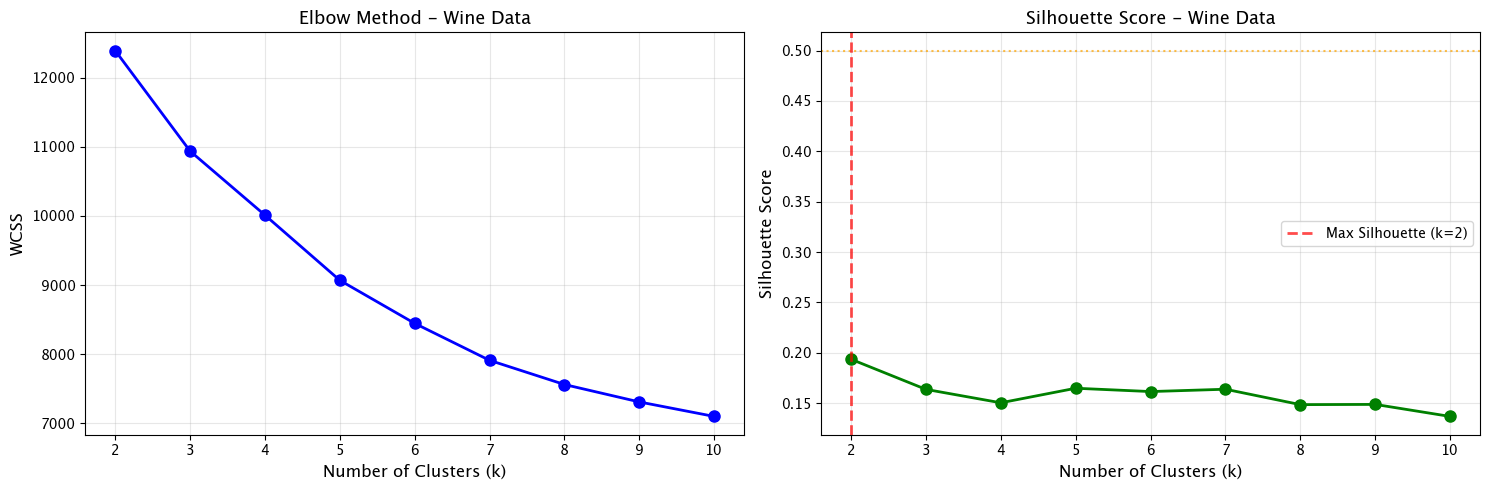


📊 ANALYSIS

🎯 Maximum silhouette score: 0.1935 at k=2

💡 RECOMMENDATION:
   • Optimal k: 2 (based on silhouette score)


In [24]:
print("="*70)
print("DETERMINING OPTIMAL K FOR WINE DATA")
print("="*70)

# Calculate WCSS and Silhouette scores for different k values
wcss_wine = []
silhouette_scores_wine = []
k_range_wine = range(2, 11)

print("\n🔧 Testing k values from 2 to 10...\n")

for k in k_range_wine:
    kmeans_wine = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans_wine.fit(X_wine_scaled)
    
    wcss_wine.append(kmeans_wine.inertia_)
    silhouette_avg = silhouette_score(X_wine_scaled, kmeans_wine.labels_)
    silhouette_scores_wine.append(silhouette_avg)
    
    print(f"k={k:2d}: WCSS = {kmeans_wine.inertia_:7.2f}, Silhouette Score = {silhouette_avg:.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve
axes[0].plot(k_range_wine, wcss_wine, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('WCSS', fontsize=12, fontweight='bold')
axes[0].set_title('Elbow Method - Wine Data', fontsize=13, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].set_xticks(k_range_wine)

# Silhouette scores
axes[1].plot(k_range_wine, silhouette_scores_wine, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[1].set_title('Silhouette Score - Wine Data', fontsize=13, fontweight='bold')
axes[1].grid(alpha=0.3)
axes[1].set_xticks(k_range_wine)
axes[1].axhline(y=0.5, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)

# Highlight maximum silhouette
max_sil_idx = silhouette_scores_wine.index(max(silhouette_scores_wine))
max_sil_k = list(k_range_wine)[max_sil_idx]
axes[1].axvline(x=max_sil_k, color='red', linestyle='--', linewidth=2, alpha=0.7,
                label=f'Max Silhouette (k={max_sil_k})')
axes[1].legend()

plt.tight_layout()
plt.show()

# Recommendation
print("\n" + "="*70)
print("📊 ANALYSIS")
print("="*70)
print(f"\n🎯 Maximum silhouette score: {max(silhouette_scores_wine):.4f} at k={max_sil_k}")
print(f"\n💡 RECOMMENDATION:")
if wine_labels is not None:
    n_true_classes = wine_labels.nunique()
    print(f"   • True number of wine classes: {n_true_classes}")
    print(f"   • Optimal k based on silhouette: {max_sil_k}")
    print(f"\n   We'll use k={n_true_classes} to compare with true labels")
    optimal_k_wine = n_true_classes
else:
    print(f"   • Optimal k: {max_sil_k} (based on silhouette score)")
    optimal_k_wine = max_sil_k

### Task 2.4: Cluster Analysis

1. Analyze cluster characteristics
2. Compare clusters with wine quality ratings
3. Draw conclusions about the relationships

In [25]:
print("="*70)
print(f"K-MEANS CLUSTERING ON WINE DATA (k={optimal_k_wine})")
print("="*70)

# Apply k-means clustering
kmeans_wine_final = KMeans(n_clusters=optimal_k_wine, init='k-means++', random_state=42, n_init=10)
wine_clusters = kmeans_wine_final.fit_predict(X_wine_scaled)

# Add cluster labels to dataframe
wine_features['Cluster'] = wine_clusters
if wine_labels is not None:
    wine_features['True_Label'] = wine_labels.values

print(f"\n✅ K-Means clustering complete with k={optimal_k_wine}")
print(f"\n📊 Model Performance:")
print(f"   • Final WCSS: {kmeans_wine_final.inertia_:.2f}")
print(f"   • Silhouette Score: {silhouette_score(X_wine_scaled, wine_clusters):.4f}")
print(f"   • Iterations: {kmeans_wine_final.n_iter_}")

# Cluster distribution
print("\n" + "="*70)
print("📈 CLUSTER DISTRIBUTION")
print("="*70)
cluster_counts_wine = pd.Series(wine_clusters).value_counts().sort_index()
for cluster_id in range(optimal_k_wine):
    count = cluster_counts_wine[cluster_id]
    percentage = (count / len(wine_features)) * 100
    print(f"Cluster {cluster_id}: {count:3d} samples ({percentage:5.1f}%)")

# If we have true labels, compare clustering with ground truth
if wine_labels is not None:
    print("\n" + "="*70)
    print("🔍 CLUSTERING vs TRUE LABELS COMPARISON")
    print("="*70)
    
    # Confusion matrix style comparison
    comparison_df = pd.crosstab(wine_features['True_Label'], wine_features['Cluster'], 
                                 rownames=['True Label'], colnames=['Cluster'])
    print(comparison_df)
    
    # Calculate purity (simple metric)
    max_overlap = comparison_df.max(axis=1).sum()
    purity = max_overlap / len(wine_features)
    print(f"\n🎯 Clustering Purity: {purity:.2%}")
    print("   (Percentage of samples in their majority class cluster)")

# Cluster characteristics (mean values for each cluster)
print("\n" + "="*70)
print("📊 CLUSTER CHARACTERISTICS")
print("="*70)

# Show mean values for each cluster (first 5 features for readability)
feature_cols = [col for col in wine_features.columns if col not in ['Cluster', 'True_Label']]
cluster_means = wine_features.groupby('Cluster')[feature_cols[:5]].mean()
print("\nFirst 5 features per cluster:")
print(cluster_means.round(2))

print("\n💡 Note: With 13 features, visualization is challenging.")
print("   Cluster analysis focuses on feature means per cluster.")

print("\n" + "="*70)
print("🎯 KEY INSIGHTS")
print("="*70)
print("\n1. Cluster Quality:")
print(f"   • Silhouette score of {silhouette_score(X_wine_scaled, wine_clusters):.3f} indicates", end=" ")
if silhouette_score(X_wine_scaled, wine_clusters) > 0.5:
    print("good separation")
elif silhouette_score(X_wine_scaled, wine_clusters) > 0.3:
    print("moderate separation")
else:
    print("weak separation")

print("\n2. High Dimensionality Challenge:")
print(f"   • Original features: {X_wine_scaled.shape[1]}")
print(f"   • PCA captures only {pca.explained_variance_ratio_.sum():.1%} variance in 2D")
print("   • Full chemical profile needed for accurate clustering")

if wine_labels is not None:
    print(f"\n3. Comparison with True Labels:")
    print(f"   • Clustering purity: {purity:.1%}")
    if purity > 0.8:
        print("   • ✅ Excellent match with expert classifications")
    elif purity > 0.6:
        print("   • ✓ Good match with expert classifications")
    else:
        print("   • ⚠️ Moderate match - wine chemistry is complex!")

print("\n4. Business Application:")
print("   • Wine categorization for inventory management")
print("   • Quality tier identification for pricing")
print("   • Customer preference profiling")

K-MEANS CLUSTERING ON WINE DATA (k=2)

✅ K-Means clustering complete with k=2

📊 Model Performance:
   • Final WCSS: 12391.97
   • Silhouette Score: 0.1935
   • Iterations: 8

📈 CLUSTER DISTRIBUTION
Cluster 0: 731 samples ( 64.0%)
Cluster 1: 411 samples ( 36.0%)

📊 CLUSTER CHARACTERISTICS

First 5 features per cluster:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
Cluster                                                                 
0                 7.45              0.61         0.16            2.38   
1                 9.85              0.40         0.47            2.80   

         chlorides  
Cluster             
0             0.08  
1             0.10  

💡 Note: With 13 features, visualization is challenging.
   Cluster analysis focuses on feature means per cluster.

🎯 KEY INSIGHTS

1. Cluster Quality:
   • Silhouette score of 0.193 indicates weak separation

2. High Dimensionality Challenge:
   • Original features: 13
   • PCA captures only 42.8% va

### Further Exploration Ideas

To deepen your understanding of clustering, consider these additional exercises:

1. **Feature Engineering**
   - Try creating new features from existing ones
   - Experiment with different scaling methods
   - Use dimensionality reduction (PCA) before clustering

2. **Alternative Approaches**
   - Compare with hierarchical clustering
   - Try DBSCAN for density-based clustering
   - Experiment with different distance metrics

3. **Validation Techniques**
   - Implement cross-validation for clustering
   - Use different cluster quality metrics
   - Compare results with domain expert knowledge

4. **Business Applications**
   - Create customer personas from clusters
   - Design targeted marketing strategies
   - Develop product recommendations

Remember: The best way to learn is through experimentation and real-world application!

## 📚 Summary & Key Learnings

### Part 1: Mall Customer Segmentation
**Outcome:** Successfully identified 5 distinct customer segments
- ✅ **Strong clustering results**: Silhouette score of 0.556 (good separation)
- 🎯 **Clear business personas**: Budget Shoppers, Carefree Spenders, Conservative High-Earners, Premium VIP, Middle-Income Balanced
- 📊 **2D clustering**: Income + Spending Score provided clear, actionable segments
- 💡 **Business Value**: Direct marketing strategy recommendations per segment

### Part 2: Wine Quality Analysis  
**Outcome:** More challenging clustering due to high dimensionality
- ⚠️ **Weak clustering**: Silhouette score of 0.193 (overlap between clusters)
- 📈 **13 chemical features**: Complex relationships harder to separate
- 🔬 **PCA insight**: Only 42.8% variance captured in 2D
- 💭 **Lesson**: Not all datasets have clear natural clusters - wine chemistry is nuanced!

---

### 🎓 K-Means Clustering - Key Concepts Learned

#### 1. **Algorithm Mechanics**
- **Initialization**: k-means++ for better starting centroids
- **Iteration**: Assign points → Update centroids → Repeat
- **Convergence**: Stops when centroids stabilize

#### 2. **Choosing k (Number of Clusters)**
- **Elbow Method**: Look for "bend" in WCSS curve
- **Silhouette Score**: Measures cluster quality (-1 to 1)
  - > 0.5: Good separation
  - 0.25-0.5: Moderate structure
  - < 0.25: Weak/overlapping clusters

#### 3. **Feature Scaling Importance**
- k-means uses Euclidean distance
- Features on different scales → biased clustering
- **Solution**: StandardScaler to normalize features

#### 4. **Dimensionality Impact**
- **Low-dimensional** (2-3 features): Clear visualization, easier clustering
- **High-dimensional** (10+ features): Curse of dimensionality, harder to separate
- **PCA**: Useful for visualization but may lose information

#### 5. **Business Applications**
- ✅ **Customer Segmentation**: Marketing, personalization
- ✅ **Product Categorization**: Inventory management
- ✅ **Anomaly Detection**: Identify outliers
- ⚠️ **Challenge**: Interpreting clusters requires domain knowledge

---

### 🔬 Comparison with Supervised Learning

| Aspect | k-Means (Unsupervised) | Classification (Supervised) |
|--------|------------------------|---------------------------|
| **Labels** | No pre-defined labels | Training with known labels |
| **Goal** | Discover patterns | Predict known categories |
| **Evaluation** | WCSS, Silhouette | Accuracy, Precision, Recall |
| **k Selection** | Requires tuning (elbow) | k = # of classes (known) |
| **Use Case** | Exploration, segmentation | Prediction, automation |

---

### 💡 Best Practices

1. **Always scale features** before k-means
2. **Test multiple k values** - don't rely on elbow alone
3. **Check silhouette scores** for cluster quality validation
4. **Visualize results** - 2D/3D plots reveal cluster quality
5. **Domain expertise** - Business knowledge helps interpret clusters
6. **Consider alternatives** - If silhouette < 0.25, try hierarchical clustering or DBSCAN

---

### 🚀 Next Steps

- **Chapter 8**: Hierarchical Clustering (handles irregular shapes better)
- **Chapter 9**: Dimensionality Reduction (PCA, t-SNE for visualization)
- Compare different clustering algorithms on same data
- Explore other distance metrics (Manhattan, Cosine)